# Punktpartikkel i 2D

### FY1003 Elektrisitet og Magnetisme - Numerisk Øving 1

Det elektrxske felt og potensxal for en punktpartikkel er allerede kjent i vilkårlig dimensjon. Hensikten med denne øvingen er å lære hvordan man håndterer numerikk i flere dimensjoner, både mht. de forskjellige metodene som fins for å plotte 2-dimensjonale systemer, og bruk av meshgrids. Det forventes at bruk av 1-dimensjonale arrays er kjent fra tidligere. 

### Oppgave 1: Elektrisk Potensial

Fra Coloumbs lov er det kjent at det elektriske potensialet i 2 dimensjoner en avstand, $r = \sqrt{x^2 + y^2}$, fra en punktpartikkel med ladning $q$ er gitt ved 
\begin{equation}
V(r) = \frac{q}{4\pi \epsilon_0}\frac{1}{r}\text{,}
\end{equation}
hvor $\epsilon_0$ er den elektriske permittivitet i vakum. Første del av øvingen vil gå ut på å plotte dette potensialet for en punktpartikkel med ladning $q = e$ plassert i origo, mellom $\pm L = \pm 10\text{nm}$.

$\textbf{b)}$ For å løse problemer i to dimensjoner er det nødvendig med en ny måte å diskretisere koordinatene. Det er ikke lenger tilstrekkelig med éndimensjonale $1 \times n$ arrays. Vi trenger enten en $n \times n$ array hvor hvert punkt er en 2-dimensjonal vektor, eller en separat $n \times n$ array for hver akse. I denne øvingen skal vi bruke den sistnevnte metoden, ved å bruke $\texttt{numpy}$s $\texttt{meshgrid}$ funksjon.

Bruk $\texttt{np.meshgrid}$ til å generere to variabler, $\texttt{xv}$ og $\texttt{yv}$, som inneholder $x$ og $y$ koordinater respektivt.

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 

n = 10
L = 10e-9

xv, yv = np.meshgrid(np.linspace(-L, L, n), np.linspace(-L, L, n))


$\textbf{c)}$ Via bruk av array-operasjoner, lag en variabel $\texttt{V}$ som inneholder potensialet $V$ for alle $x$ og $y$. Merk at det her vil oppstå en singularitet i $\vec{r} = 0$ som må tas stilling til. En måte å håndtere dette problemet er å sette verdien for potensialet over en viss grense lik konstant, f.eks. $\texttt{V[}>\texttt{c]} = \texttt{c}$.

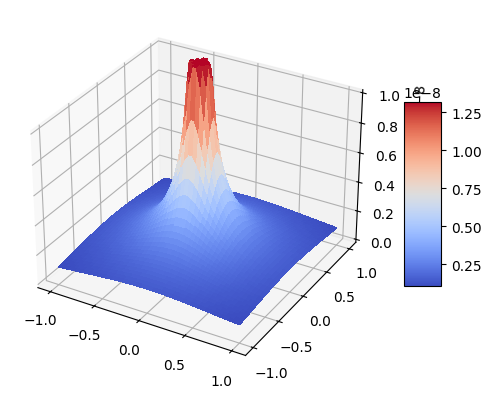

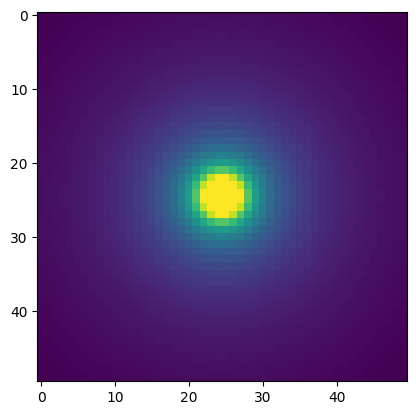

In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
from matplotlib import cm

n = 50
q = 1.6e-19
e_0 = 8.854e-12

xv, yv = np.meshgrid(np.linspace(-1, 1, n), np.linspace(-1, 1, n))          
r = np.sqrt(xv ** 2 + yv ** 2)
V = 1 / r * (q * 1 / (4 * np.pi * e_0))
u = 1.322e-8
V = np.clip(V, 0, u)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xv, yv, V, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_zlim(0,1e-8)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

plt.imshow(V)
plt.show()


### Oppgave 2: Elektrisk Felt

Det elektriske felt for en punktpartikkel er også kjent fra Coloumbs lov, men generelt hvis man vet potensialet kan en finne det elektriske feltet ved å bruke gradienten, $\vec{E}=-\nabla V$. I én dimensjon er gradienten kun en vanlig derivert, og vi får $E(r) = -\frac{\text{d}V(r)}{\text{d}r}$. En kan beregne dette numerisk ved å diskretisere derivasjonen,
\begin{equation}
    E(r_\text{i}) = -\frac{V(r_\text{i+1})-V(r_\text{i-1})}{r_\text{i+1}-r_\text{i-1}}\text{.}
\end{equation}
Dette er et eksempel på en finite difference quotient, mer spesifikt er dette en $\textit{central finite difference quotient}$. 

$\textbf{b)}$ Lag en funksjon som tar inn et potensial $\texttt{V}$ som argument, regner ut gradienten i hvert punkt, og returnerer det elektriske feltet som to $n-2 \times n-2$ arrays (årsaken til at dimensjonen blir $n-2$ og ikke $n$ er at man ikke kan beregne gradienten på randen med central finite differences, men må da bruke enten det som kalles forward/backward finite differences).

$\textit{Hint:}$ Bruk array slicing for å gjøre koden mer effektiv.

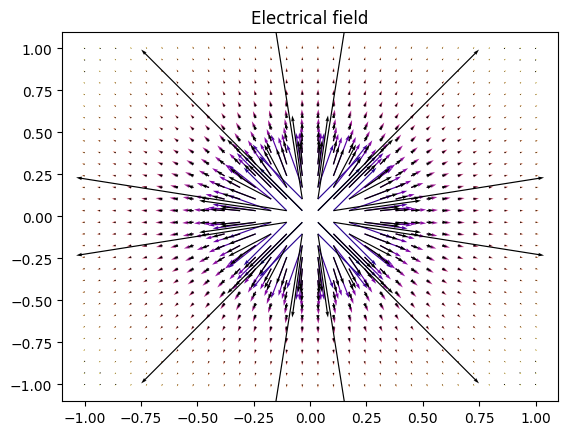

In [3]:
import matplotlib.pyplot as plt 
import numpy as np

def f(V, n):
    Ex, Ey = [], []
    
    for i in range(0, n):
        Ex.append(-np.gradient(V[i]))

    for i in range(0, n):
        trsp = np.transpose(V)[i]
        Ey.append(-np.gradient(trsp))

    return np.array(Ex), np.transpose(np.array(Ey))

n = 30
xv, yv = np.meshgrid(np.linspace(-1, 1, n), np.linspace(-1, 1, n))     
V = 1 / np.sqrt(xv ** 2 + yv ** 2)
Ex, Ey = f(V, n)

fig, ax = plt.subplots()
qq = plt.quiver(xv, yv, np.clip(Ex, -1, 1), np.clip(Ey, -1, 1), np.sqrt(xv**2 + yv**2), cmap=plt.cm.plasma)
qq = plt.quiver(xv, yv, Ex, Ey)
ax.set_title('Electrical field')
plt.show()
